# Stop Practice

<img src="images/jderobot.png" width="15%" height="15%" style="float:left;padding-right:15px"/>

## 1- Introduction
---

In this exercise we are going to implement a "Formula 1" intelligence to follow a red line across the circuit. To do it, the student needs to have at least the next knowledge:
* Python programming skills
* Color spaces (RGB, HSV, etc)
* Basic understanding of [OpenCV library](http://opencv.org/)

## 2- Exercise components

<img src="images/car.png" width="30%" height="30%" style="float:right;padding-right:15px"/>
### 2.1- Gazebo simulator
---
Gazebo simulator will be running in the background. The Gazebo world employed for this exercise has one element: a simulated car robot.The Formula1 robot will provide camera where the images will be provided to the student and a laser where the walls will be detected. 

### 2.2 Stop Practice Component
This component has been developed specifically to carry out this exercise. This component connects to Gazebo to teleoperate the car (or send orders to it) and receives images from its cameras. The student has to modify this component and add code to accomplish the exercise. In particular, it is required to modify the execute() method.

## 3- Exercise initialization
---
First of all, we need to run the Gazebo simulator:

In [1]:
import subprocess
gazebo = subprocess.Popen(("gazebo", "stop.world"))

After launch the gazebo simulator, we must wait a few second to let the gazebo's world be opened. Then a world like the one shows in the following picture should appears:

<img src="images/world.png">

Second, we need to import the necessary files. To start coding, we need to call Follow_Line class once. Run this code and wait a few seconds until follow line initialization finishes with an OK message:

In [2]:
#!/usr/bin/python
#-*- coding: utf-8 -*-
import threading
import time
import math
import cv2
import numpy as np
from datetime import datetime
from math import pi as pi

from stop import StopPractice
from printer import printImage

time_cycle = 80

%matplotlib inline

sp = StopPractice()
sp.play()

loading Config file ./stop_conf.yml
Receiving Stop.CameraC Image from ICE interfaces
Receiving Stop.CameraL Image from ICE interfaces
Receiving Stop.CameraR Image from ICE interfaces
Publishing Stop.Motors with ICE interfaces
Receiving Stop.Pose3D from ICE interfaces
Stop_Practice Components initialized OK
Stop_Practice is running


Now we can start coding to give intelligence to the Formula1 robot. We can do it modifying the execute() method from Follow Line component. This method will be called iteratively. Each iteration, we'll print a message.

In [ ]:
# Implement execute method
def execute(self):
    print "Running execute iteration"
      
sp.setExecute(execute)

Stop printing the updating of the method with an empty instruction:

In [9]:
def execute(self):
    pass

sp.setExecute(execute)

Code updated


### 3.1 - API
---

To get the images from the cameras:
    * input_image = self.getImageC()
    * input_image = self.getImageR()
    * input_image = self.getImageL()


To move the car:
    * self.motors.sendV(10)
    * self.motors.sendW(5)


To change the image inRGB to HSV:
    * image_HSV = cv2.cvtColor()

To get the car poses:
    * yaw = self.pose3d.getPose3d().yaw
---

To save the images, you can use the following commands:

In [3]:
def execute(self):
    img = self.getImageC()
    self.set_color_image(img)
    
sp.setExecute(execute)


Code updated


When you have the image saved, you can use these instructions to show the camera images:

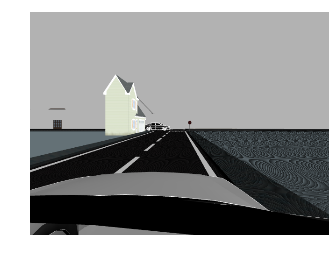

In [4]:
imageCamera = sp.get_color_image()
printImage(imageCamera)

To get the right camera images:

In [5]:
def execute(self):
    img = self.getImageR()
    self.set_color_image(img)
    
sp.setExecute(execute)

Code updated


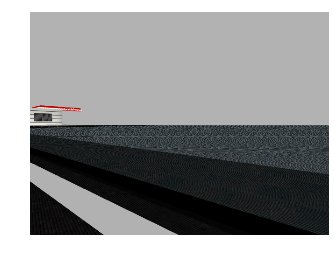

In [6]:
imageCamera = sp.get_color_image()
printImage(imageCamera)

To get the left camera images:

In [7]:
def execute(self):
    img = self.getImageL()
    self.set_color_image(img)
    
sp.setExecute(execute)

Code updated


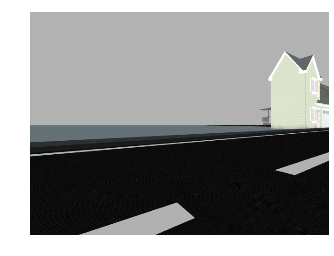

Exception in thread Thread-4:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/jderobot/lib/python2.7/comm/ice/threadSensor.py", line 38, in run
    self.sensor.update()
  File "/opt/jderobot/lib/python2.7/comm/ice/cameraIceClient.py", line 75, in update
    imageData = self.proxy.getImageData(self.imgFormat)
  File "/opt/jderobot/lib/python2.7/rgbd_ice.py", line 571, in getImageData
    return _M_jderobot.ImageProvider._op_getImageData.invoke(self, ((format, ), _ctx))
ConnectionRefusedException: Ice.ConnectionRefusedException:
Connection refused

Exception in thread Thread-7:
Traceback (most recent call last):
  File "/usr/lib/python2.7/threading.py", line 801, in __bootstrap_inner
    self.run()
  File "/opt/jderobot/lib/python2.7/comm/ice/threadSensor.py", line 38, in run
    self.sensor.update()
  File "/opt/jderobot/lib/python2.7/comm/ice/pose3dIceClient.py", line 74, in update
    pose = self.p

In [8]:
imageCamera = sp.get_color_image()
printImage(imageCamera)

Or you can use the following instructions to show the filtered images:

In [ ]:
def execute(self):
    img = self.getImage()
    self.set_threshold_image(img)
    
sp.setExecute(execute)


In [ ]:
segmentedImage = sp.get_threshold_image()
printImage(segmentedImage)